In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("preprocessed/processed_data.csv")

In [3]:
data

,X,flag,alon_week,alon_wend,child_bull,comp_house,comp_noint_bed_16,comp_int_bed_16,comp_week,comp_wend,...,talk_phon_wend,text_week,text_wend,tran_week,tran_wend,tv_week,tv_wend,weight_16,work_week,work_wend
0,1,synthetic,1-2 hours,1-2 hours,No,Yes,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,59.294132,3 or more hours,3 or more hours
1,2,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.812426,NaN,NaN
4,5,synthetic,1-2 hours,3 or more hours,No,NaN,Yes,NaN,1-2 hours,Less than 1 hour,...,Not at all,Not at all,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,3 or more hours,62.270030,1-2 hours,1-2 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,13731,synthetic,1-2 hours,3 or more hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,3 or more hours,3 or more hours,NaN,1-2 hours,1-2 hours
13731,13732,synthetic,1-2 hours,1-2 hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,1-2 hours,1-2 hours,1 or more hours,1 or more hours,3 or more hours,3 or more hours,58.075832,Less than 1 hour,Less than 1 hour
13732,13733,synthetic,Less than 1 hour,1-2 hours,No,Yes,NaN,NaN,Less than 1 hour,1-2 hours,...,Any at all,1-2 hours,1-2 hours,Less than 1 hour,Less than 1 hour,Not at all,Less than 1 hour,NaN,Less than 1 hour,1-2 hours


### Target values : dep_score, dep_thoughts, has_dep_diag, prim_diag, secd_diag

### Definitions:
#### dep_score : Child's depression score on CIS-R.
- Higher scores indicate higher levels of depressive symptomatology.  They were scored following: +1 if less/no enjoyment with life during the past week, +1 if depressed for >3day in past week, +1 if depressed for >3hr in any day of past week, +1 if unable to be cheered up. See CIS-R Descriptive Summary for details.

#### dep_thoughts : Child's number of depressive thoughts on CIS-R. 
- Higher scores indicate higher levels of depressive thoughts. There were scored following: +1 if feelings of needless guilt, +1 if feelings of low self-esteem, +1 if feelings of hopelessness, +1 if felt that life not worth living, +1 if thought seriously about suicide. See CIS-R Descriptive Summary for details.

#### has_dep_diag : Child has ICD-10 diagnosis of depression
- Calculated from their Revised Computerised Interview Schedule (CIS-R) score. See CIS-R Descriptive Summary for more information.

#### prim_diag : Child's primary diagnosis in accordance with ICD-10 criteria.
- Primary diagnosis was determined using the CIS-R. 0 = none, 1 = mild neurosis, 2 = mild GAD, 3 = OCD, 4 = mixed anxiety and depression, 5 = specific phobia, 6 = social phobia, 7 = agoraphobia, 8 = GAD, 9 = panic disorder, 10 = mild depression, 11 = moderate depression, 12 = severe depression

#### secd_diag : Child's secondary diagnosis in accordance with ICD-10.
- Secondary diagnosis was determined using the CIS-R. 0 = none, 1 = mild neurosis, 2 = mild GAD, 3 = OCD, 4 = mixed anxiety and depression, 5 = specific phobia, 6 = social phobia, 7 = agoraphobia, 8 = GAD, 9 = panic disorder, 10 = mild depression, 11 = moderate depression, 12 = severe depression

### Extract only target values

In [4]:
# 'targets' contains all target columns 
targets = data[['dep_score', 'dep_thoughts', 'has_dep_diag', 'prim_diag', 'secd_diag']]

In [5]:
targets

,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag
0,0.0,NaN,No ICD-10 diagnosis of depression,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13729,NaN,NaN,NaN,NaN,NaN
13730,NaN,NaN,NaN,NaN,NaN
13731,NaN,NaN,NaN,NaN,NaN
13732,0.0,NaN,No ICD-10 diagnosis of depression,0.0,0.0


In [6]:
targets_dep_score    = targets[['dep_score']]
targets_dep_thoughts = targets[['dep_thoughts']]
targets_has_dep_diag = targets[['has_dep_diag']]
targets_prim_diag    = targets[['prim_diag']]
targets_secd_diag    = targets[['secd_diag']]

In [7]:
# drop all NaN values
targets_dep_score = targets_dep_score.dropna()
targets_dep_thoughts = targets_dep_thoughts.dropna()
targets_has_dep_diag = targets_has_dep_diag.dropna()
targets_prim_diag = targets_prim_diag.dropna()
targets_secd_diag = targets_secd_diag.dropna()

In [8]:
targets_dep_score.reset_index(drop=True, inplace=True)
targets_dep_thoughts.reset_index(drop=True, inplace=True)
targets_has_dep_diag.reset_index(drop=True, inplace=True)
targets_prim_diag.reset_index(drop=True, inplace=True)
targets_secd_diag.reset_index(drop=True, inplace=True)

In [9]:
print(targets_dep_score.shape[0])
print(targets_dep_thoughts.shape[0])
print(targets_has_dep_diag.shape[0])
print(targets_prim_diag.shape[0])
print(targets_secd_diag.shape[0])

4513
1805
4513
4513
4513


### Visualisation: dep_score

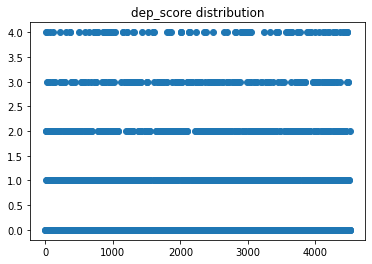

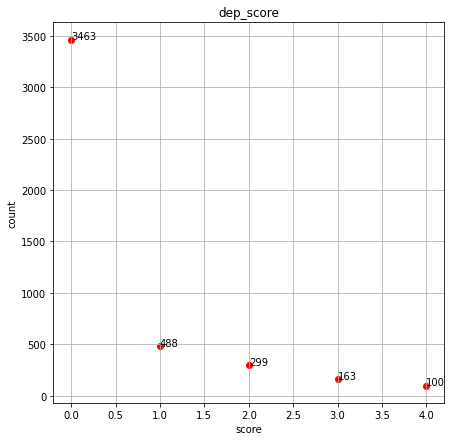

In [10]:
plt.scatter(np.linspace(0, targets_dep_score.shape[0]-1, targets_dep_score.shape[0]), targets_dep_score['dep_score'])
plt.title('dep_score distribution')
plt.show()

# another way
# targets_dep_score.loc[targets_dep_score.dep_score == 0.0, 'dep_score'].count()
score0 = (targets_dep_score.dep_score == 0.0).sum()
score1 = (targets_dep_score.dep_score == 1.0).sum()
score2 = (targets_dep_score.dep_score == 2.0).sum()
score3 = (targets_dep_score.dep_score == 3.0).sum()
score4 = (targets_dep_score.dep_score == 4.0).sum()

fig, ax = plt.subplots(figsize=(7,7))

for i,j in zip([0,1,2,3,4], [score0, score1, score2, score3, score4]):
    ax.annotate(str(round(j, 2)),xy=(i,j))
    
ax.scatter([0,1,2,3,4], [score0, score1, score2, score3, score4], label='dep_score', marker='o', c='red')
ax.set_title('dep_score')
ax.set_xlabel('score')
ax.set_ylabel('count')
ax.grid()

assert targets_dep_score.shape[0] == np.sum([score0, score1, score2, score3, score4])

In [11]:
# This data would be meaningless but added to see the trend
np_dep_score = targets_dep_score['dep_score']

dep_score_mean = np.mean(np_dep_score)
dep_score_median = np.median(np_dep_score)
dep_score_sd = np.std(np_dep_score)
print("dep_score_mean: ", dep_score_mean)
print("dep_score_median: ", dep_score_median)
print("dep_score_standard_deviation: ", dep_score_sd)

dep_score_mean:  0.43762463992909373
dep_score_median:  0.0
dep_score_standard_deviation:  0.9280200501145376


### Visualisation: dep_thoughts

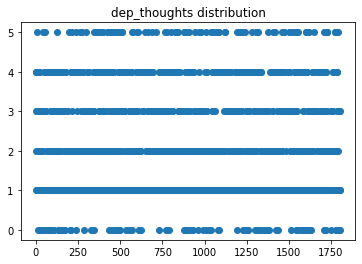

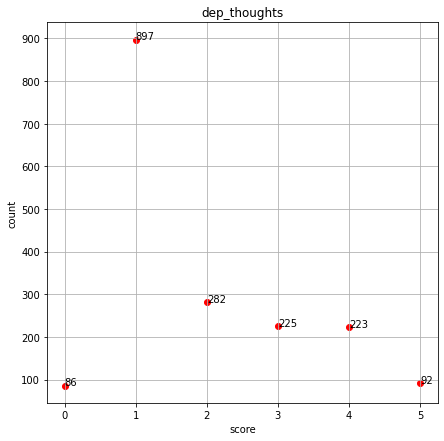

In [12]:
# modify here
plt.scatter(np.linspace(0, targets_dep_thoughts.shape[0]-1, targets_dep_thoughts.shape[0]), targets_dep_thoughts['dep_thoughts'])
# modify here
plt.title('dep_thoughts distribution')
plt.show()

# another way
# targets_dep_score.loc[targets_dep_score.dep_score == 0.0, 'dep_score'].count()

# modify here
score0 = (targets_dep_thoughts.dep_thoughts == 0.0).sum()
score1 = (targets_dep_thoughts.dep_thoughts == 1.0).sum()
score2 = (targets_dep_thoughts.dep_thoughts == 2.0).sum()
score3 = (targets_dep_thoughts.dep_thoughts == 3.0).sum()
score4 = (targets_dep_thoughts.dep_thoughts == 4.0).sum()
score5 = (targets_dep_thoughts.dep_thoughts == 5.0).sum()

fig, ax = plt.subplots(figsize=(7,7))

# modify here
for i,j in zip([0,1,2,3,4,5], [score0, score1, score2, score3, score4, score5]):
    ax.annotate(str(round(j, 2)),xy=(i,j))

# modify here
ax.scatter([0,1,2,3,4,5], [score0, score1, score2, score3, score4, score5], label='dep_thoughts', marker='o', c='red')
ax.set_title('dep_thoughts')
ax.set_xlabel('score')
ax.set_ylabel('count')
ax.grid()

# modify here
assert targets_dep_thoughts.shape[0] == np.sum([score0, score1, score2, score3, score4, score5])

In [13]:
np_dep_thoughts = targets_dep_thoughts['dep_thoughts']

dep_thoughts_mean = np.mean(np_dep_thoughts)
dep_thoughts_median = np.median(np_dep_thoughts)
dep_thoughts_sd = np.std(np_dep_thoughts)
print("dep_score_mean: ", dep_thoughts_mean)
print("dep_score_median: ", dep_thoughts_median)
print("dep_thoughts_sd: ", dep_thoughts_sd)

dep_score_mean:  1.932409972299169
dep_score_median:  1.0
dep_thoughts_sd:  1.3268491025975742


### Visualisation: has_dep_diag

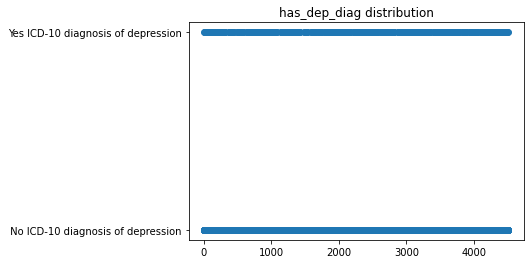

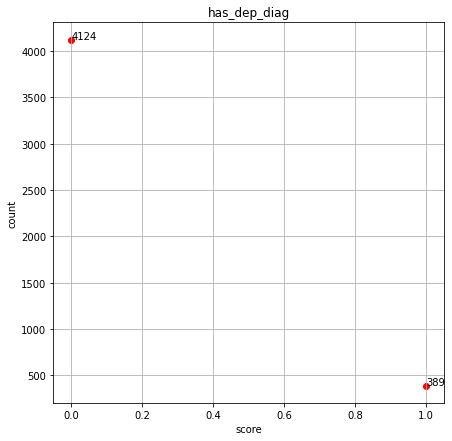

In [14]:
# modify here
plt.scatter(np.linspace(0, targets_has_dep_diag.shape[0]-1, targets_has_dep_diag.shape[0]), targets_has_dep_diag['has_dep_diag'])
# modify here
plt.title('has_dep_diag distribution')
plt.show()

# another way
# targets_dep_score.loc[targets_dep_score.dep_score == 0.0, 'dep_score'].count()

# modify here
score0 = (targets_has_dep_diag.has_dep_diag == ' No ICD-10 diagnosis of depression').sum()
score1 = (targets_has_dep_diag.has_dep_diag == 'Yes ICD-10 diagnosis of depression').sum()

fig, ax = plt.subplots(figsize=(7,7))

# modify here
for i,j in zip([0,1], [score0, score1]):
    ax.annotate(str(round(j, 2)),xy=(i,j))

# modify here
ax.scatter([0,1], [score0, score1], label='has_dep_diag', marker='o', c='red')
ax.set_title('has_dep_diag')
ax.set_xlabel('score')
ax.set_ylabel('count')
ax.grid()

# modify here
assert targets_has_dep_diag.shape[0] == np.sum([score0, score1])

### Visualisation: targets_prim_diag

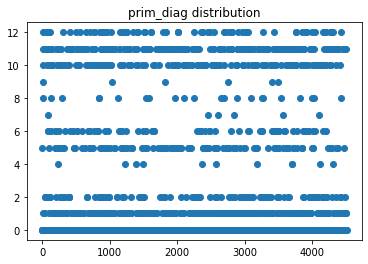

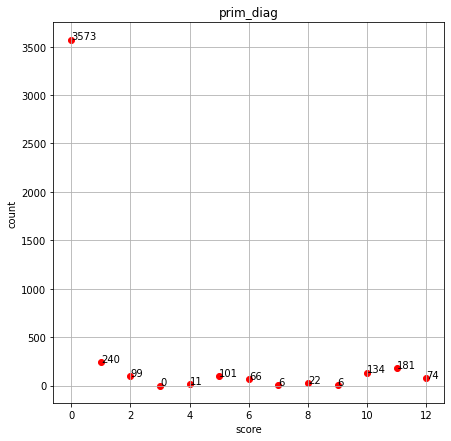

In [15]:
# modify here
plt.scatter(np.linspace(0, targets_prim_diag.shape[0]-1, targets_prim_diag.shape[0]), targets_prim_diag['prim_diag'])
# modify here
plt.title('prim_diag distribution')
plt.show()

# another way
# targets_dep_score.loc[targets_dep_score.dep_score == 0.0, 'dep_score'].count()

# modify here
score0  = (targets_prim_diag.prim_diag == 0).sum()
score1  = (targets_prim_diag.prim_diag == 1).sum()
score2  = (targets_prim_diag.prim_diag == 2).sum()
score3  = (targets_prim_diag.prim_diag == 3).sum()
score4  = (targets_prim_diag.prim_diag == 4).sum()
score5  = (targets_prim_diag.prim_diag == 5).sum()
score6  = (targets_prim_diag.prim_diag == 6).sum()
score7  = (targets_prim_diag.prim_diag == 7).sum()
score8  = (targets_prim_diag.prim_diag == 8).sum()
score9  = (targets_prim_diag.prim_diag == 9).sum()
score10 = (targets_prim_diag.prim_diag == 10).sum()
score11 = (targets_prim_diag.prim_diag == 11).sum()
score12 = (targets_prim_diag.prim_diag == 12).sum()

fig, ax = plt.subplots(figsize=(7,7))

# modify here
for i,j in zip([0,1,2,3,4,5,6,7,8,9,10,11,12], [score0, score1, score2, score3, score4, score5, score6, score7, score8, score9, score10, score11, score12]):
    ax.annotate(str(round(j, 2)),xy=(i,j))

# modify here
ax.scatter([0,1,2,3,4,5,6,7,8,9,10,11,12], [score0, score1, score2, score3, score4, score5, score6, score7, score8, score9, score10, score11, score12], label='prim_diag', marker='o', c='red')
ax.set_title('prim_diag')
ax.set_xlabel('score')
ax.set_ylabel('count')
ax.grid()

# modify here
assert targets_prim_diag.shape[0] == np.sum([score0, score1, score2, score3, score4, score5, score6, score7, score8, score9, score10, score11, score12])

In [16]:
np_prim_diag = targets_prim_diag['prim_diag']

prim_diag_mean = np.mean(np_prim_diag)
prim_diag_median = np.median(np_prim_diag)
prim_diag_sd = np.std(np_prim_diag)
print("prim_diag_mean: ", prim_diag_mean)
print("prim_diag_median: ", prim_diag_median)
print("prim_diag_sd: ", prim_diag_sd)

prim_diag_mean:  1.3015732328827831
prim_diag_median:  0.0
prim_diag_sd:  3.1999805710012375


### Visualisation: targets_secd_diag

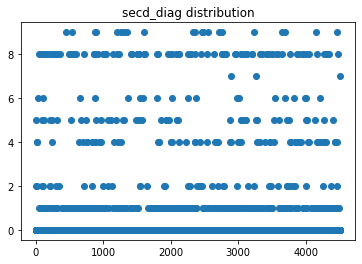

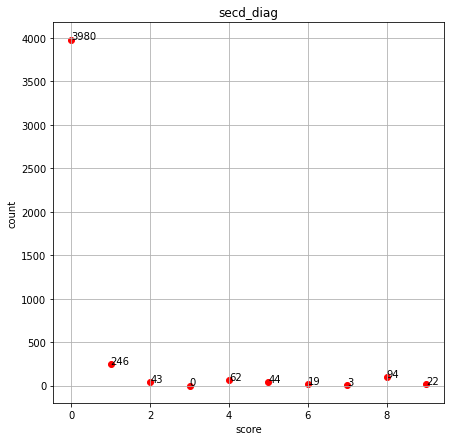

In [17]:
# modify here
plt.scatter(np.linspace(0, targets_secd_diag.shape[0]-1, targets_secd_diag.shape[0]), targets_secd_diag['secd_diag'])
# modify here
plt.title('secd_diag distribution')
plt.show()

# another way
# targets_dep_score.loc[targets_dep_score.dep_score == 0.0, 'dep_score'].count()

# modify here
score0  = (targets_secd_diag.secd_diag == 0).sum()
score1  = (targets_secd_diag.secd_diag == 1).sum()
score2  = (targets_secd_diag.secd_diag == 2).sum()
score3  = (targets_secd_diag.secd_diag == 3).sum()
score4  = (targets_secd_diag.secd_diag == 4).sum()
score5  = (targets_secd_diag.secd_diag == 5).sum()
score6  = (targets_secd_diag.secd_diag == 6).sum()
score7  = (targets_secd_diag.secd_diag == 7).sum()
score8  = (targets_secd_diag.secd_diag == 8).sum()
score9  = (targets_secd_diag.secd_diag == 9).sum()

fig, ax = plt.subplots(figsize=(7,7))

# modify here
for i,j in zip([0,1,2,3,4,5,6,7,8,9], [score0, score1, score2, score3, score4, score5, score6, score7, score8, score9]):
    ax.annotate(str(round(j, 2)),xy=(i,j))

# modify here
ax.scatter([0,1,2,3,4,5,6,7,8,9], [score0, score1, score2, score3, score4, score5, score6, score7, score8, score9], label='secd_diag', marker='o', c='red')
ax.set_title('secd_diag')
ax.set_xlabel('score')
ax.set_ylabel('count')
ax.grid()

# modify here
assert targets_secd_diag.shape[0] == np.sum([score0, score1, score2, score3, score4, score5, score6, score7, score8, score9])

In [18]:
np_secd_diag = targets_secd_diag['secd_diag']

secd_diag_mean = np.mean(np_secd_diag)
secd_diag_median = np.median(np_secd_diag)
secd_diag_sd = np.std(np_secd_diag)
print("dep_score_mean: ", secd_diag_mean)
print("dep_score_median: ", secd_diag_median)
print("sd of secd_diag: ", secd_diag_sd)

dep_score_mean:  0.417682251274097
dep_score_median:  0.0
sd of secd_diag:  1.5145113093571438
